In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [2]:
# generating data
# yt = 50 + 0.4et-1 + 0.3et-2 + et
# et ~ N(0,1)

In [3]:
errors = np.random.normal(0,1,400)

In [4]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')
date_index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=123, freq='D')

In [5]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])
series

[48.05044842514666,
 50.436792994372766,
 50.65610669327481,
 49.51996338571219,
 50.17892071136656,
 47.839948851385415,
 50.50341691881998,
 51.64382600650108,
 50.45515363685225,
 49.868178998871215,
 49.8573673871166,
 49.29748297622365,
 50.66656705785862,
 50.847566777710604,
 50.44536034309541,
 49.572312958633354,
 50.22404729166067,
 50.3360057685789,
 50.33083152482181,
 50.296264731128225,
 50.82264249769427,
 50.157009211273646,
 51.5315990999773,
 50.971041559575184,
 50.76878840145535,
 50.380473533632184,
 50.25890530499441,
 49.95227364025129,
 50.08447325528581,
 50.309369963328386,
 49.48352301537636,
 50.57255154413533,
 49.48350852085554,
 49.50556948670755,
 49.85039809423794,
 48.64961141208399,
 49.71532125015217,
 47.33376798240678,
 49.0630977339863,
 49.30768952958145,
 48.69788356178451,
 49.43812943139065,
 48.31320841862846,
 48.43666000120425,
 49.30808313655196,
 48.76503964182986,
 49.40903290785912,
 48.2177529256914,
 51.06047738514149,
 52.17351640811

In [6]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))
series

2019-09-01    48.050448
2019-09-02    50.436793
2019-09-03    50.656107
2019-09-04    49.519963
2019-09-05    50.178921
                ...    
2019-12-28    51.418326
2019-12-29    50.267789
2019-12-30    50.192363
2019-12-31    50.210409
2020-01-01    51.376598
Freq: D, Length: 123, dtype: float64

pd.infer_freq finds the time difference between two data values.
asfreq is used to convert a time series into a series with a sqpcific frequency.

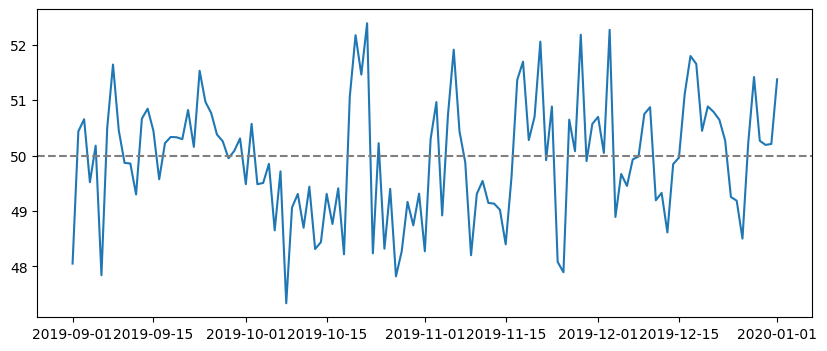

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [8]:
from scipy.stats import pearsonr
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

<BarContainer object of 10 artists>

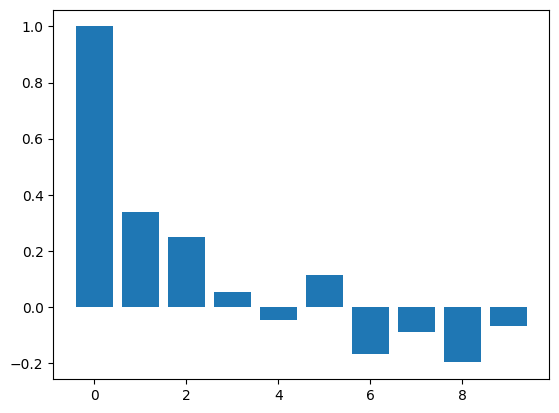

In [9]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 20 artists>

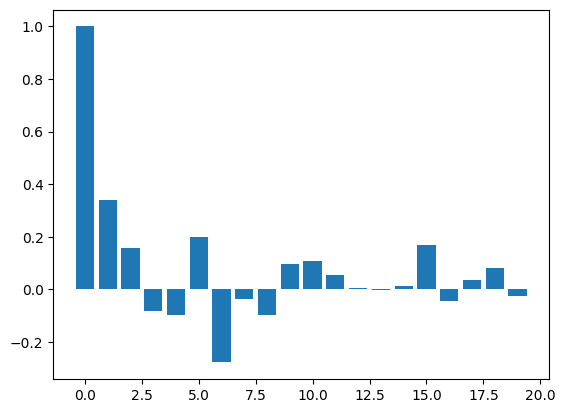

In [10]:
pacf_vals = pacf(series)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [11]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]
train_data

2019-09-01    48.050448
2019-09-02    50.436793
2019-09-03    50.656107
2019-09-04    49.519963
2019-09-05    50.178921
                ...    
2019-12-26    48.501187
2019-12-27    50.228410
2019-12-28    51.418326
2019-12-29    50.267789
2019-12-30    50.192363
Freq: D, Length: 121, dtype: float64

In [12]:
test_data

2019-12-31    50.210409
2020-01-01    51.376598
Freq: D, dtype: float64

In [13]:
model = ARIMA(train_data, order=(0,0,2))

In [14]:
model_fit = model.fit()

In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -171.077
Date:                Sat, 12 Aug 2023   AIC                            350.155
Time:                        11:17:25   BIC                            361.338
Sample:                    09-01-2019   HQIC                           354.697
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9254      0.161    310.612      0.000      49.610      50.240
ma.L1          0.3079      0.091      3.373      0.001       0.129       0.487
ma.L2          0.3763      0.082      4.615      0.0

predicted model = 50 + 0.44et-1 + 0.43et-2

In [16]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date, pred_end_date)

2019-12-31 00:00:00 2020-01-01 00:00:00


In [17]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
predictions

2019-12-31    49.691816
2020-01-01    49.849515
Freq: D, Name: predicted_mean, dtype: float64

In [18]:
residuals = test_data - predictions
residuals

2019-12-31    0.518593
2020-01-01    1.527083
Freq: D, dtype: float64

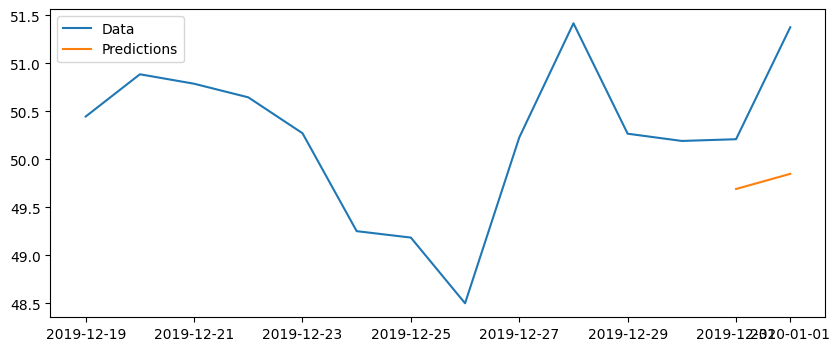

In [19]:
plt.figure(figsize=(10,4))
plt.plot(series[-14:])
plt.plot(predictions)
plt.legend(('Data','Predictions'))

In [20]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.02


In [21]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.1403775845908044
